Week 1

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print(tf.__version__)

2.2.0


In [2]:
model = tf.keras.Sequential(([keras.layers.Dense(units=1,input_shape=[1])]))

In [3]:
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])

In [4]:
x = np.array([1,2,-3,4,-5,6,7])
y = np.array([1,3,-7,7,-11,11,13])


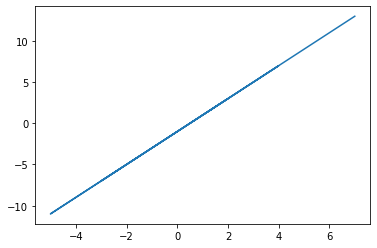

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(x,y)
plt.show()

In [6]:
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 31ms/step - loss: 36.9957 - accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.8345 - accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 5.5596 - accuracy: 0.1429
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 2.5899 - accuracy: 0.1429
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5113 - accuracy: 0.1429
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1072 - accuracy: 0.1429
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9441 - accuracy: 0.1429
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8676 - accuracy: 0.1429
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.1429
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7891 - accuracy: 0.1429
Epoch 11/100
1/1 [=========

In [7]:
print(model.predict([10]))

[[19.021296]]


Week 2


In [105]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.fashion_mnist.load_data()

In [106]:
print("Training dataset shape: ",train_images.shape,train_labels.shape)
print("Testing dataset shape: ",test_images.shape,test_labels.shape)

Training dataset shape:  (60000, 28, 28) (60000,)
Testing dataset shape:  (10000, 28, 28) (10000,)


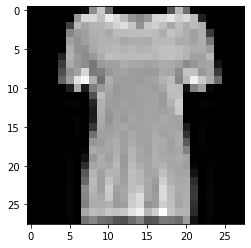

Corresponding label:  T-shirt/Top


In [107]:
labels = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.imshow(train_images[10],cmap='gray')
plt.show()
print("Corresponding label: ",labels[train_labels[10]])

In [108]:
train_images = np.reshape(train_images,(60000,784))
test_images = np.reshape(test_images,(10000,784))
train_images = train_images/255.0
test_images = test_images/255.0
from keras.utils import to_categorical
#train_labels = to_categorical(train_labels,len(labels))
#test_labels = to_categorical(test_labels,len(labels))
print(train_labels.shape)

(60000,)


In [109]:
model = keras.Sequential([
    #keras.layers.Flatten(),
    keras.layers.Dense(32,input_shape=(784,)),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
    
])

In [110]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [120]:
model.fit(train_images,train_labels,epochs=10,
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss',mode='auto',patience=3)])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2077 - accuracy: 0.9202: 0s - loss: 0.2
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2045 - accuracy: 0.9221
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2025 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1976 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1957 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1921 - accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1866 - accuracy: 0.9270
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1851 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1811 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/st

In [121]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8845


[0.4220978915691376, 0.8845000267028809]

In [122]:
predictions = model.predict(test_images)

In [124]:
import numpy as np
print(labels[np.argmax(predictions[0])])

Ankle boot


Week 3
